In [4]:
# Dataset from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import linear_model, model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import string
import nltk

##Reading Datasets

In [2]:
fake = pd.read_csv("./Fake.csv")
real = pd.read_csv("./Real.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
real.shape

(21417, 4)

##Preparing and cleaning the data

In [5]:
# Setting a flag to distinguish between real and fake datasets
fake["target"] = "fake"
real["target"] = "real"

In [6]:
# Concatenating the dataframes
data = pd.concat([fake, real]).reset_index(drop=True)
data.shape

# Shuffling the data
from sklearn.utils import shuffle

data = shuffle(data)
data = data.reset_index(drop=True)

data.head()

,title,text,subject,date,target
0,How Florida’s Lax Gun Laws Are Endangering Th...,On the heels of the mass shooting at Pulse nig...,News,"June 12, 2016",fake
1,"Coalition says fewer than 3,000 IS fighters re...",BAGHDAD (Reuters) - The United States-led inte...,worldnews,"December 5, 2017",real
2,OBAMA’S GITMO BOARD RELEASES “High Risk” Explo...,"While Obama golfs in Martha s Vineyard, yet an...",Government News,"Aug 14, 2016",fake
3,U.S. voting commission vice chair urged new vo...,WASHINGTON (Reuters) - The vice chairman of a ...,politicsNews,"October 6, 2017",real
4,Wedge issue: Texas golf range offers Clinton a...,"LONGVIEW, Texas (Reuters) - Looking for a way ...",politicsNews,"November 2, 2016",real


In [7]:
# Removing the date column from the data
data.drop(["date"], axis=1, inplace=True)
data.head()

,title,text,subject,target
0,How Florida’s Lax Gun Laws Are Endangering Th...,On the heels of the mass shooting at Pulse nig...,News,fake
1,"Coalition says fewer than 3,000 IS fighters re...",BAGHDAD (Reuters) - The United States-led inte...,worldnews,real
2,OBAMA’S GITMO BOARD RELEASES “High Risk” Explo...,"While Obama golfs in Martha s Vineyard, yet an...",Government News,fake
3,U.S. voting commission vice chair urged new vo...,WASHINGTON (Reuters) - The vice chairman of a ...,politicsNews,real
4,Wedge issue: Texas golf range offers Clinton a...,"LONGVIEW, Texas (Reuters) - Looking for a way ...",politicsNews,real


In [8]:
# Removing the title column
data.drop(["title"], axis=1, inplace=True)
data.head()

,text,subject,target
0,On the heels of the mass shooting at Pulse nig...,News,fake
1,BAGHDAD (Reuters) - The United States-led inte...,worldnews,real
2,"While Obama golfs in Martha s Vineyard, yet an...",Government News,fake
3,WASHINGTON (Reuters) - The vice chairman of a ...,politicsNews,real
4,"LONGVIEW, Texas (Reuters) - Looking for a way ...",politicsNews,real


In [9]:
# Converting the text column to lowercase
data["text"] = data["text"].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,on the heels of the mass shooting at pulse nig...,News,fake
1,baghdad (reuters) - the united states-led inte...,worldnews,real
2,"while obama golfs in martha s vineyard, yet an...",Government News,fake
3,washington (reuters) - the vice chairman of a ...,politicsNews,real
4,"longview, texas (reuters) - looking for a way ...",politicsNews,real


In [10]:
# Removing punctuation from text
def punctuation_remove(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = "".join(all_list)
    return clean_str


data["text"] = data["text"].apply(punctuation_remove)
data.head()

,text,subject,target
0,on the heels of the mass shooting at pulse nig...,News,fake
1,baghdad reuters the united statesled internat...,worldnews,real
2,while obama golfs in martha s vineyard yet ano...,Government News,fake
3,washington reuters the vice chairman of a vot...,politicsNews,real
4,longview texas reuters looking for a way to h...,politicsNews,real


In [11]:
# Removing stopwords from text
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = stopwords.words("english")

data["text"] = data["text"].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohitgaur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,subject,target
0,heels mass shooting pulse nightclub orlando fl...,News,fake
1,baghdad reuters united statesled international...,worldnews,real
2,obama golfs martha vineyard yet another decisi...,Government News,fake
3,washington reuters vice chairman voter fraud p...,politicsNews,real
4,longview texas reuters looking way help reliev...,politicsNews,real


##Exploring the data

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


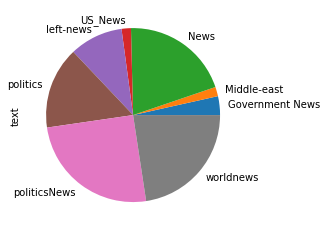

In [12]:
# Number of articles per subject
print(data.groupby(["subject"])["text"].count())
data.groupby(["subject"])["text"].count().plot(kind="pie")
plt.show()

target
fake    23481
real    21417
Name: text, dtype: int64


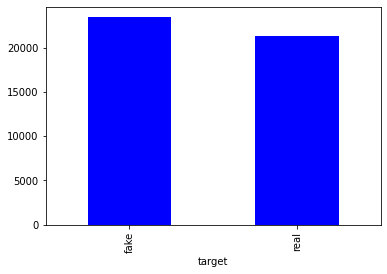

In [13]:
# Number of fake and real articles
print(data.groupby(["target"])["text"].count())
data.groupby(["target"])["text"].count().plot(kind="bar", color="blue")
plt.show()

In [14]:
# Counting the most frequently occuring words in text
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()


def counter(text, column_text, quantity):
    all_words = " ".join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequency, x="Word", y="Frequency", color="red")
    ax.set(ylabel="Count")
    plt.xticks(rotation="vertical")
    plt.show()

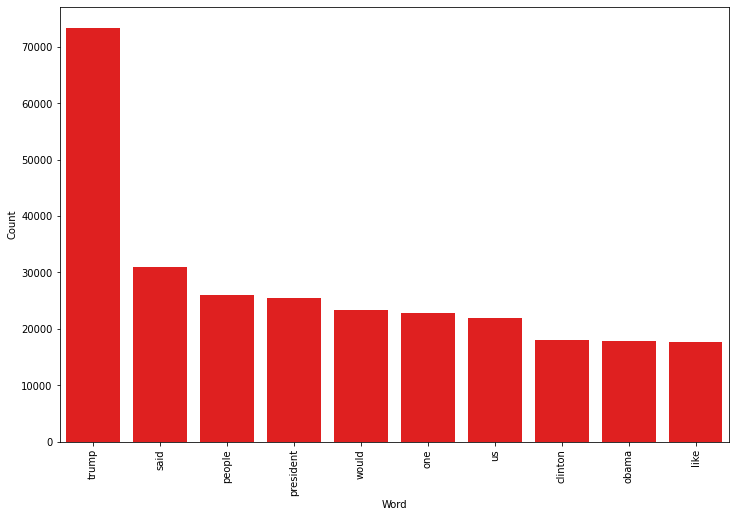

In [15]:
# The top 15 most frequently occuring words in FAKE news
counter(data[data["target"] == "fake"], "text", 10)

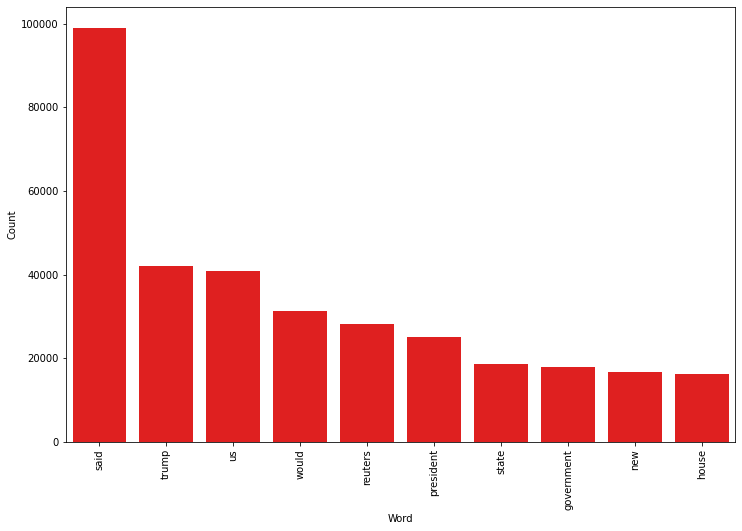

In [16]:
# The top 15 most frequently occuring words in REAL news
counter(data[data["target"] == "real"], "text", 10)

## Logistic Regression

In [17]:
# Vectorizing and applying TF-IDF
X_train, X_test, y_train, y_test = train_test_split(data["text"], data.target, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("model", LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Model Accuracy
prediction = model.predict(X_test)
print("Model Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100, 2)))

Model Accuracy: 98.92%


In [18]:
# Function to plot confusion matrix
from sklearn import metrics
import itertools


def plot_confusion_matrix(c_matrix, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):

    plt.imshow(c_matrix, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        c_matrix = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    threshold_v = c_matrix.max() / 2.0
    for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
        plt.text(
            j,
            i,
            c_matrix[i, j],
            horizontalalignment="center",
            color="white" if c_matrix[i, j] > threshold_v else "black",
        )

    plt.tight_layout()
    plt.ylabel("Ground truth")
    plt.xlabel("Prediction")

Confusion matrix, without normalization


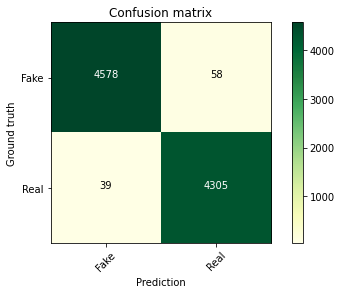

In [19]:
# Plotting the confusion matrix
c_matrix = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(c_matrix, classes=["Fake", "Real"], cmap="YlGn")

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.51%


Confusion matrix, without normalization


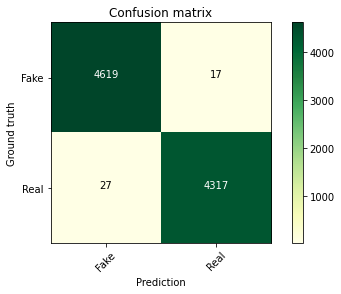

In [22]:
c_matrix = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(c_matrix, classes=['Fake', 'Real'], cmap="YlGn")

In [23]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.86%


Confusion matrix, without normalization


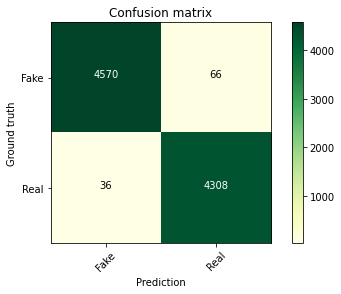

In [25]:
c_matrix = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(c_matrix, classes=['Fake', 'Real'], cmap="YlGn")